In [45]:
#Step 1. 필요한 모듈을 실행합니다.
# pip install konlpy 를 설치하세요
# pip uninstall tweepy
# pip install tweepy==3.10.0

from konlpy.tag import *        #pip install konlpy 먼저 하세요
import matplotlib.pyplot as plt #pip install matplotlib 먼저 하세요
from matplotlib import font_manager , rc
from wordcloud import WordCloud  # pip install wordcloud 먼저 하세요
from collections import Counter

#참고: 파이썬에서 사용가능한 형태소 분석기 종류
# Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)

okt = Okt()
kkma = Kkma( )

print("Kkma:",kkma.nouns("나는 사과, 사과 , 복숭아, 복숭아가 좋아요"))
print("Okt:",okt.nouns("나는 사과, 사과 , 복숭아, 복숭아가 좋아요"))
print("Okt:",okt.nouns("산토끼와고양이강아지가핸드폰으로사진을찍어요"))

Kkma: ['사과', '복숭아']
Okt: ['나', '사과', '사과', '복숭아', '복숭아']
Okt: ['산토끼', '고양이', '강아지', '핸드폰', '사진']


In [46]:
#텍스트 파일을  불러옵니다
data1 = open("./실습용 파일/파이썬_텍스트분석예제_1.txt").read( )
print(data1)
print("\n")

data2 = okt.nouns(data1)
print("1.추출된 키워드:", data2)

print("\n")
data3 = Counter(data2)
print("2.단어별 빈도수:",data3)

나는 사과와 바나나가 제일 좋아요^^
나는 역시 복숭아와 사과가 좋아요!
나는 단감, 단감, 단감, 단감이 최고 좋아요!
나는 토마토와 오렌지를 가장 좋아하죠



1.추출된 키워드: ['나', '사과', '바나나', '제일', '나', '역시', '복숭아', '사과', '나', '단감', '단감', '단감', '단감', '최고', '나', '토마토', '오렌지', '가장']


2.단어별 빈도수: Counter({'나': 4, '단감': 4, '사과': 2, '바나나': 1, '제일': 1, '역시': 1, '복숭아': 1, '최고': 1, '토마토': 1, '오렌지': 1, '가장': 1})


In [47]:
#텍스트 파일을  불러옵니다
data11 = open("C:/new/py_temp/실습용 파일/파이썬_텍스트분석예제_1.txt").readlines( )
for a in data11 :
    print(a.replace("\n",""))

print()

# 각 줄별로 중복된 단어가 나올 경우 제거하기
data22=[]
for i in data11 :
        data2=kkma.nouns(i)
        for j in range(0,len(data2)) :
            data22.append(data2[j])
print('각 줄별로 중복을 제거한 결과:' , data22)

나는 사과와 바나나가 제일 좋아요^^
나는 역시 복숭아와 사과가 좋아요!
나는 단감, 단감, 단감, 단감이 최고 좋아요!
나는 토마토와 오렌지를 가장 좋아하죠

각 줄별로 중복을 제거한 결과: ['사과', '바나나', '나', '복숭아', '사과', '나', '단감', '최고', '나', '토마토', '오렌지']


In [48]:
#중복을 제거한 후 각 단어별 빈도수
data23 = Counter(data22)
print("단어별 빈도수:",data23)

단어별 빈도수: Counter({'나': 3, '사과': 2, '바나나': 1, '복숭아': 1, '단감': 1, '최고': 1, '토마토': 1, '오렌지': 1})


In [49]:
okt.pos(data1)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('사과', 'Noun'),
 ('와', 'Josa'),
 ('바나나', 'Noun'),
 ('가', 'Josa'),
 ('제일', 'Noun'),
 ('좋아요', 'Adjective'),
 ('^^', 'Punctuation'),
 ('\n', 'Foreign'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('역시', 'Noun'),
 ('복숭아', 'Noun'),
 ('와', 'Josa'),
 ('사과', 'Noun'),
 ('가', 'Josa'),
 ('좋아요', 'Adjective'),
 ('!', 'Punctuation'),
 ('\n', 'Foreign'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('단감', 'Noun'),
 (',', 'Punctuation'),
 ('단감', 'Noun'),
 (',', 'Punctuation'),
 ('단감', 'Noun'),
 (',', 'Punctuation'),
 ('단감', 'Noun'),
 ('이', 'Josa'),
 ('최고', 'Noun'),
 ('좋아요', 'Adjective'),
 ('!', 'Punctuation'),
 ('\n', 'Foreign'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('토마토', 'Noun'),
 ('와', 'Josa'),
 ('오렌지', 'Noun'),
 ('를', 'Josa'),
 ('가장', 'Noun'),
 ('좋아하죠', 'Adjective'),
 ('\n', 'Foreign')]

In [50]:
#Step 4. 불용어 제거하기
sword = open("C:/new/py_temp/실습용 파일/불용어목록.txt").read()
print(sword)
data4 = [ each_word for each_word in data22
          if each_word not in sword ]
print(data4)

최고
역시
가장
제일
나


['사과', '바나나', '복숭아', '사과', '단감', '토마토', '오렌지']


In [51]:
# list 내포 for 반복문
# 문법 :
# [ 표현식 for 항목in 반복할데이터 if조건문 ]
no = [1,2,3]
result = [ i*10 for i in no]
print(result)

#no2 값 중 짝수만 제곱
no2 = [1,2,3,4,5,6]
result2 = [ i*i for i in no2  if i %2==0 ]
print(result2)

[10, 20, 30]
[4, 16, 36]


In [52]:
#글자수로 불용어 제거하기
data5 = []
for i in data4 :
    if len(i) >= 2 and len(i) <= 10 :
        data5.append(i) 
print(data5)

['사과', '바나나', '복숭아', '사과', '단감', '토마토', '오렌지']


In [53]:
#용어 정리하기
data6 = [ ]
for i in data5 :
    if len(i) >= 2 and len(i) <= 10 :
        if i == '제주' or i == '제주도' or i=='우도' or i =='애월' :
            data6.append(i.replace(i,'제주도'))
        elif i == '국내' or i == '대한민국' or i == '한국' :
            data6.append(i.replace(i,'국내여행'))
        elif i == '아이' or i == '어린이' or i == '아기' or i =='키즈':
            data6.append(i.replace(i,'아이'))
        else :
            data6.append(i)


In [54]:
data6

['사과', '바나나', '복숭아', '사과', '단감', '토마토', '오렌지']

In [64]:
# Step 5. 단어별 빈도수 집계하기
data7 = Counter(data6)
data8 = data7.most_common(10)
print(data8)
data9 = dict(data8)
print(data9)

[('체험', 115), ('푸드', 97), ('아이', 61), ('물고기', 43), ('먹거리', 40), ('메뚜기', 38), ('것', 33), ('잡기', 32), ('중', 28), ('직접', 27)]
{'체험': 115, '푸드': 97, '아이': 61, '물고기': 43, '먹거리': 40, '메뚜기': 38, '것': 33, '잡기': 32, '중': 28, '직접': 27}


In [56]:
# Step 6. 추출된 빈도수를 데이터프레임으로 변환하기
import pandas as pd
data9_2 = pd.DataFrame(data8)
data9_3 = data9_2.rename(columns={0:'키워드' , 1:'빈도수'})
display(data9_3)
data9_3.to_csv('c:\\py_temp\\주요키워드.csv' , index=False , encoding='utf-8-sig')
data9_10 = data9_3.head(10)
display(data9_10)

,키워드,빈도수
0,사과,2
1,바나나,1
2,복숭아,1
3,단감,1
4,토마토,1
5,오렌지,1


,키워드,빈도수
0,사과,2
1,바나나,1
2,복숭아,1
3,단감,1
4,토마토,1
5,오렌지,1


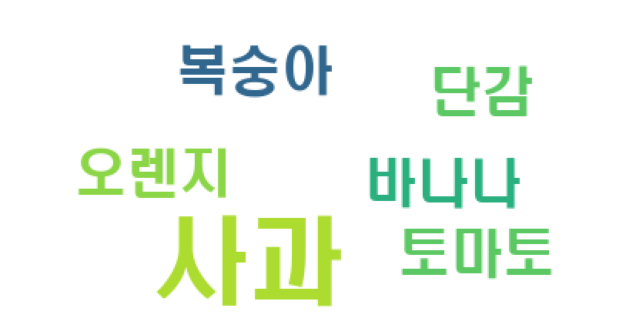

In [57]:
#Step 7. 워드 클라우드 그리기
wordcloud = WordCloud(font_path="c:/windows/fonts/H2HDRM.TTF" ,
                       relative_scaling=0.9,
                       background_color="white"
                     ).generate_from_frequencies(data9)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

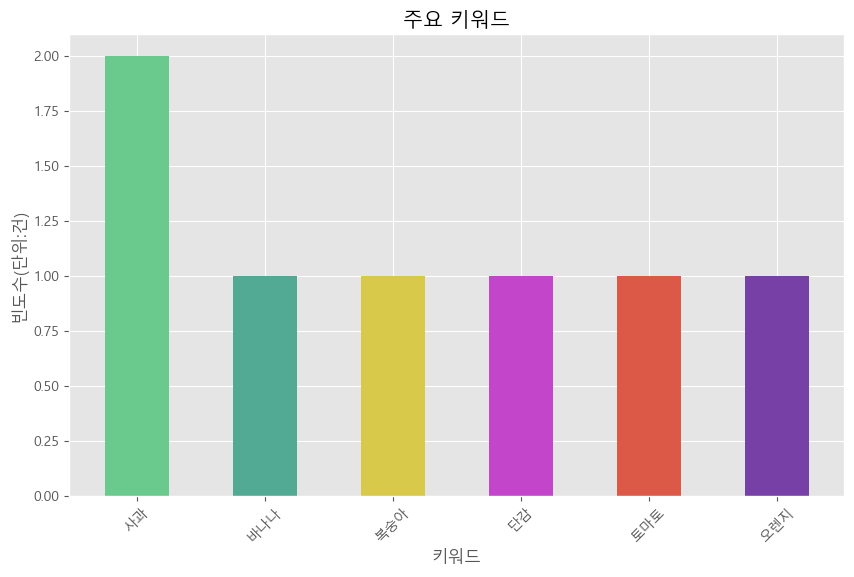

In [58]:
#바 차트 그리기 - 상위 10개의 키워드만 그래프로 그리기
from matplotlib import pyplot as plt 
import matplotlib.font_manager as fm
import matplotlib
import numpy as np

font_location = "C:\\Windows\\Fonts\\malgun.ttf"
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

x = data9_10['키워드']
y = data9_10['빈도수']

colors = [np.random.rand(3,) for _ in data9_10['키워드']]  #색상을 랜덤으로 지정하기

plt.bar(x,y , color = colors , width=0.5)
plt.title('주요 키워드')
plt.ylabel('빈도수(단위:건)')
plt.xlabel('키워드')
plt.xticks(rotation=45)
plt.show()

In [59]:
#Lesson 3.국내 여행 키워드 분석
#Step 1. 필요한 모듈을 실행합니다.
from konlpy.tag import *        #pip install konlpy 먼저 하세요
import matplotlib.pyplot as plt #pip install matplotlib 먼저 하세요
from matplotlib import font_manager , rc
from wordcloud import WordCloud  # pip install wordcloud 먼저 하세요
from collections import Counter
import pandas as pd

okt = Okt()
kkma = Kkma( )

#Step 2 . 텍스트 파일을 불러와서 형태소 분석을 합니다.
data1 = open("C:/new/py_temp/실습용 파일/국내여행_2017.txt").read( )
data1

print(data1)
print("\n")

#Step 3. 키워드를 추출합니다
data2 = okt.nouns(data1)

print("1.추출된 키워드:", data2)
print(len(data2))

#Step 4. 추출된 단어들의 빈도를 조사한 후 많이 언급된 100개만 출력합니다
print("\n")
data4 = Counter(data2)
data5 = data4.most_common(100)

print("2.단어별 빈도수:",data5)

#Step 5. 불용어 제거하기
sword = open("C:/new/py_temp/실습용 파일/와푸gsub.txt").read()
#print(sword)
data6 = [ each_word for each_word in data2
          if each_word not in sword ]
print(data6)

#Step 6. 글자수로 불용어 제거하기
data7 = []
for i in data6 :
    if len(i) >= 2 and len(i) <= 10 :
        data7.append(i) 
print(data7)

# data8 = []
# for i in data7 :
#     if len(i) >= 2 and len(i) <= 10 :
#         if i == '제주' or i == '제주도' or i=='우도' or i =='애월' :
#             data8.append(i.replace(i,'제주도'))
#         elif i == '국내' or i == '대한민국' or i == '한국' :
#             data8.append(i.replace(i,'국내여행'))
#         elif i == '아이' or i == '어린이' or i == '아기' or i =='키즈':
#             data8.append(i.replace(i,'아이'))
# else :
#             data8.append(i)


# Step 7. 단어별 빈도수 집계하기
data9 = Counter(data7)
data10 = data9.most_common(100)
print(data10)
data11 = dict(data10)

총 338 건 중 5 번째 블로그 데이터를 수집합니다==============
1.블로그 주소:https://blog.naver.com/
2.작성자 닉네임:
3.작성 일자:2017. 12. 27. 14:00
4.블로그 내용:완주와일드푸드축제 아시나요?예전에는 딱히 볼거리가 없어서 그냥 하던말던 가지 않았는데요갈수록 체험거리가 늘어가는 것 같아서아이들 데리고 갈만하드라구요 ㅎ그리고 지금은 이미 끝났지만여름약간 지나서 하기 때문에 야외에서 놀기도 좋답니다~셔틀버스를 타고 들어가야 나오는 완주푸드축제!처음에 무슨 푸드축제를 하나~ 했는데역시 가면 먹을거리가 다양하답니다 ㅎ기존의 그냥 먹거리가 많은 장소와는 약간 달라요!먹거리를 내가 직접 잡을 수도 있고, 요리할 수도 있는 곳이랍니다 그 중에 물고기 맨손으로 잡기!펄떡이는 야생의 즐거움을 느끼러 왔답니다물고기잡기는 시간이 정해져 있기 때문에꼭 시간 맞춰서 입장하셔야해요선착순으로 딱 몇명까지만 받기때문에~혹시나 늦게 가면 체험을 못할 지도 모르기때문이죠~이런 체험도 완주와일드푸드축제 아니면 못해보는 것 아니겠어요?열심히 다들 물고기를 잡고!!각자 구워먹을 수 있는 장소도 있답니다 ㅎ즉석에서 잡아서 먹을 수 있기 때문에싱싱하기도하고아이들도 자연의 신비로움을 느끼기도 할 수 있어서 참 좋은것 같네요 ㅎ이렇게 놀고나면 하루가 어떻게 지나가는지도 모르겠고 말이죠!아마도 축제날에는 사람들이 모두 여기에 몰리는게 아닐까 싶을 정도로 정신이없죠 ㅎ숯불에 구워먹는 물고기!생선구이 정말 최고죠~생선을 별로 좋아하지 않는 우리 아이들도 정말 맛있게 먹드라구요 ㅎ본인이 직접잡아서 요리하는 것까지 지켜보니까맛이 궁금해지기도 하나봅니다~ ㅎㅎ푸드축제 말고도 다양한 체험거리도 많아요작게나마 리프트타는 것도 있고~이런 체험이 많아서 매년 가는것 같아요 ㅎ그리고 전북권에서 사시는 분들에겐 가깝기도 하구요!그리고 정말, 특이한 경험을 추가로 했답니다!옜날에 어른들이 귀뚜라미나 메뚜기 튀겨먹는다고하잖아요?그때는 윽~~ 했는데 ㅎㅎ이젠 체험할 수 있는

In [62]:
#Step 8. 워드 클라우드 그리기
wordcloud = WordCloud(font_path="c:/windows/fonts/H2HDRM.TTFF" ,
                       relative_scaling=0.4,
                       background_color="white"
                     ).generate_from_frequencies(data11)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

import numpy as np         # pip install numpy
from PIL import Image      # pip install Image
from wordcloud import ImageColorGenerator
korea = np.array(Image.open("d:/data//data/image/korea.jpg"))
wc = WordCloud(font_path="c:/windows/fonts/H2HDRM.TTF" ,
                       relative_scaling=0.2,mask = korea,
                       background_color="white",
                       min_font_size=1,
                       max_font_size=50,
                       max_words=500
                     ).generate_from_frequencies(data11)
plt.figure(figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

OSError: cannot open resource

In [63]:
import numpy as np         # pip install numpy
from PIL import Image      # pip install Image
from wordcloud import ImageColorGenerator
heart = np.array(Image.open("d:\data\\data\image\heart.jpg"))
wc = WordCloud(font_path="c:/windows/fonts/H2HDRM.TTF" ,
                       relative_scaling=0.2,mask = heart,
                       background_color="white",
                       min_font_size=1,
                       max_font_size=50,
                       max_words=500
                     ).generate_from_frequencies(data11)
plt.figure(figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\data\\data\\image\\heart.jpg'

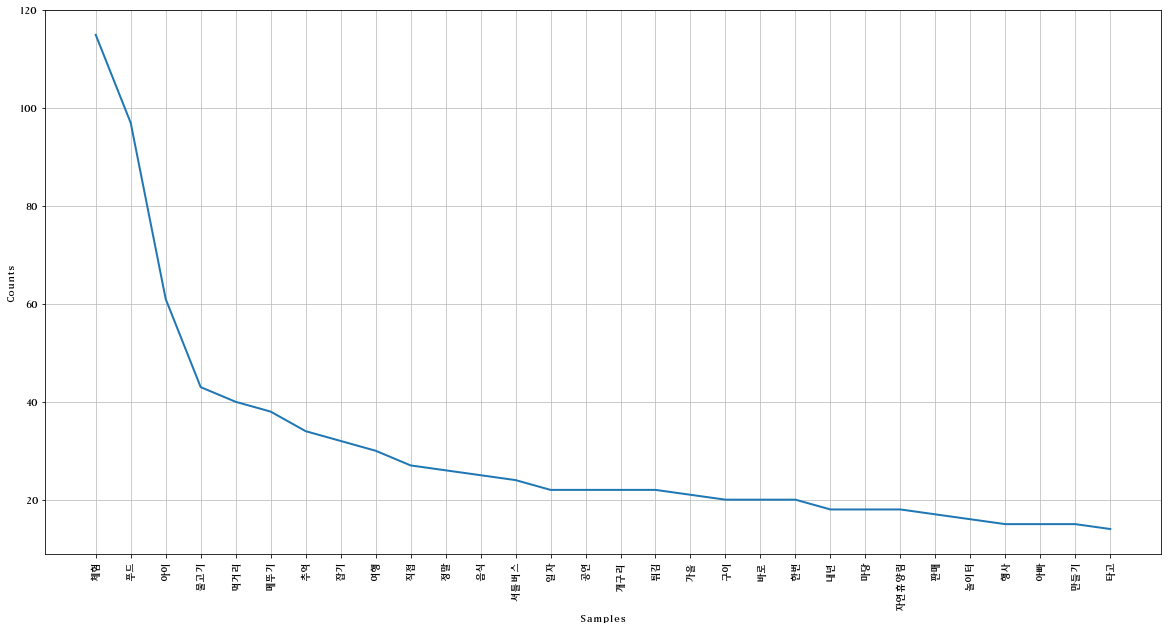

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [2]:
# Step 10. 주요 단어들의 빈도를 그래프로 표시하기
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib 

font_location="c:\windows\Fonts\HYCYSM.TTF"
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
plt.figure(figsize=(20,10))

import nltk
from nltk.probability import FreqDist

data11 = FreqDist(data7)
data11.plot(30)
